In [74]:
import json
import requests
response = requests.get("http://www.jnichols.org/messages.json")
messages = json.loads(response.text)
responseusers = requests.get("http://www.jnichols.org/users.json")
print "There are " + str(len(messages)) + " messages"
print messages [0]
users = json.loads(responseusers.text)
print "There are " + str(len(users)) + " users"
users[0]


There are 100 messages
{u'message': u'scelerisque dui. Suspendisse ac metus vitae velit egestas lacinia. Sed congue, elit sed consequat auctor, nunc nulla vulputate dui, nec tempus mauris erat eget ipsum. Suspendisse sagittis. Nullam vitae diam.', u'recipient': 33, u'sender': 25}
There are 100 users


{u'id': 1, u'location': u'Ireland', u'name': u'Ezekiel R. Frederick'}

In [75]:
counter = 0
for x in users:
    if x["location"] == "Ireland":
        counter +=1
print "There are " + str(counter) + " users from Ireland "

There are 15 users from Ireland 


In [76]:
countries = []
for x in users:
    if x["location"] not in countries:
        countries.append(x["location"])
print len(countries)

5


In [77]:
countryMembership = {}
for x in users:
    if x["location"] in countryMembership.keys():
        countryMembership[x["location"]].append(x["id"])
    else:
        countryMembership[x["location"]] = [x["id"]]
print countryMembership

{u'Canada': [3, 7, 12, 13, 17, 18, 23, 24, 26, 31, 38, 40, 41, 43, 44, 46, 50, 55, 56, 57, 63, 64, 66, 67, 78, 88, 95], u'United States': [6, 14, 19, 28, 34, 35, 36, 48, 51, 53, 58, 60, 61, 65, 69, 70, 71, 74, 76, 91, 98], u'Italy': [4, 10, 11, 15, 21, 22, 27, 30, 32, 37, 42, 45, 47, 49, 54, 59, 79, 82, 84, 85, 87, 93], u'Ireland': [1, 5, 9, 16, 25, 29, 52, 72, 77, 80, 81, 89, 96, 97, 100], u'France': [2, 8, 20, 33, 39, 62, 68, 73, 75, 83, 86, 90, 92, 94, 99]}


In [97]:
countryList = countryMembership.items()
countryList.sort(key=lambda x:len(x[1]), reverse = True)
print countryList

posList = []
countrynameList = []
idList = []

for x in range(len(countryList)):
    posList.insert(x, x)
    countrynameList.insert(x, countryList[x][0])
    idList.insert(x, len(countryList[x][1]))

print posList
print idList
print countrynameList
    


[(u'Canada', [3, 7, 12, 13, 17, 18, 23, 24, 26, 31, 38, 40, 41, 43, 44, 46, 50, 55, 56, 57, 63, 64, 66, 67, 78, 88, 95]), (u'Italy', [4, 10, 11, 15, 21, 22, 27, 30, 32, 37, 42, 45, 47, 49, 54, 59, 79, 82, 84, 85, 87, 93]), (u'United States', [6, 14, 19, 28, 34, 35, 36, 48, 51, 53, 58, 60, 61, 65, 69, 70, 71, 74, 76, 91, 98]), (u'Ireland', [1, 5, 9, 16, 25, 29, 52, 72, 77, 80, 81, 89, 96, 97, 100]), (u'France', [2, 8, 20, 33, 39, 62, 68, 73, 75, 83, 86, 90, 92, 94, 99])]
[0, 1, 2, 3, 4]
[27, 22, 21, 15, 15]
[u'Canada', u'Italy', u'United States', u'Ireland', u'France']


[]

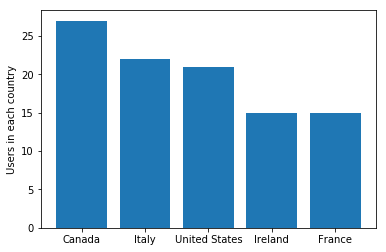

In [99]:
import matplotlib.pyplot as plt
plt.bar(posList, idList)
plt.xticks(posList, countrynameList)
plt.ylabel("Users in each country")
plt.plot()

In [79]:
def getCountry(ID):
    for x in countryMembership.items():
        if ID in x[1]:
            return x[0]
print getCountry(23)
    

Canada


In [80]:
messagesReceivedCanada = 0
messagesSentCanada = 0

for x in messages:
        if getCountry(x["sender"]) == "Canada":
            messagesSentCanada +=1
        if getCountry(x["recipient"]) == "Canada":
                messagesReceivedCanada +=1
print messagesReceivedCanada
print messagesSentCanada
                        

16
13


In [82]:
countryMessages = {}
for x in messages:
    if getCountry(x["sender"]) in countryMessages.keys():
        countryMessages[getCountry(x["sender"])][0]+=1 
    else:
        countryMessages[getCountry(x["sender"])]=[1,0]
    if getCountry(x["recipient"]) in countryMessages.keys():
        countryMessages[getCountry(x["recipient"])][1]+=1
    else:
        countryMessages[getCountry(x["recipient"])]=[0,1]
print countryMessages
    

{u'United States': [39, 23], u'Canada': [13, 16], u'Italy': [19, 30], u'Ireland': [20, 19], u'France': [9, 12]}


In [88]:
List = []
netMessages = 0

for x in range(len(countryMessages.items())):
    List.insert(x,[countryMessages.items()[x][0], countryMessages.items()[x][1][0]-countryMessages.items()[x][1][1]])
List.sort(key=lambda x: x[1], reverse=True)
print List

[[u'United States', 16], [u'Ireland', 1], [u'Canada', -3], [u'France', -3], [u'Italy', -11]]


[]

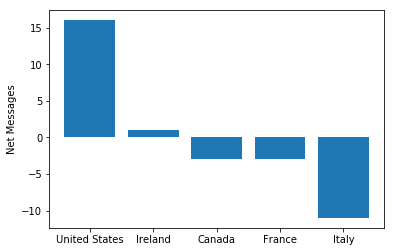

In [92]:
positionList = []
countryList = []
tallyList = []

for x in range(len(List)):
    positionList.insert(x,x)
    tallyList.insert(x, List[x][1])
    countryList.insert(x, str(List[x][0]))

import matplotlib.pyplot as plt
plt.bar(positionList, tallyList)
plt.xticks(positionList, countryList)
plt.ylabel("Net Messages")
plt.plot()


[]

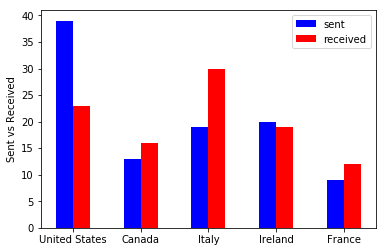

In [95]:
spots = []
sendVals = []
recVals = []
labels = []

for x in range(len(countryMessages.items())):
    spots.insert(x,x)
    sendVals.insert(x, countryMessages.items()[x][1][0])
    recVals.insert(x, (countryMessages.items()[x][1][1]))
    labels.insert(x,countryMessages.items()[x][0])
    

plt.bar([p-.25 for p in spots], sendVals, width=.25, color='b')
plt.bar([p for p in spots], recVals, width=.25, color='r')
plt.xticks([p-.125 for p in spots], labels)
plt.ylabel("Sent vs Received")
plt.legend(['sent', 'received'], loc='upper right')
plt.plot()